In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [2]:
data = pd.read_excel("cal_housing.xlsx")

KeyboardInterrupt: 

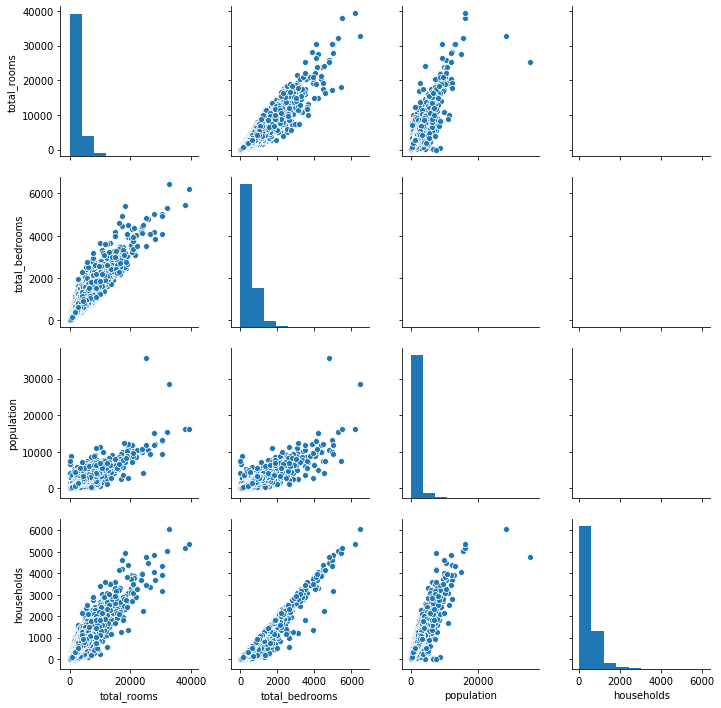

In [3]:
g = sns.pairplot(data.iloc[:,3:7])
g.savefig("pairplot.png")

In [4]:
n = 20640
n_train = 12384
n_test = 8256

In [5]:
np.random.seed(1)
index = np.arange(n)
np.random.shuffle(index) 
index_train = index[:n_train] 
index_test = index[n_train:]

In [6]:
#generate data set
D_train = data.loc[index_train,:]
D_test = data.loc[index_test,:]

In [7]:
X_train = np.array(D_train.iloc[:,0:8])
#X_train = np.hstack((np.ones(n_train).reshape(n_train,1),X_train))
y_train = np.log(np.array(D_train.iloc[:,8]))
X_test = np.array(D_test.iloc[:,0:8])
#X_test = np.hstack((np.ones(n_test).reshape(n_test,1),X_test))
y_test = np.log(np.array(D_test.iloc[:,8]))

In [7]:
X_train = np.hstack((np.ones(n_train).reshape(n_train,1),X_train))
X_test = np.hstack((np.ones(n_test).reshape(n_test,1),X_test))

In [78]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#Task 1: multicolinearity
#No standarization

K = np.linalg.eig(X_train.T.dot(X_train))[0]

In [9]:
K

array([1.93093509e+11, 3.85730126e+09, 3.94533800e+08, 7.72182631e+07,
       3.59079195e+07, 1.54202484e+06, 7.36251113e-01, 3.65058978e+04,
       2.19315118e+04])

In [10]:
#condition number
cdtNum = np.max(K)/np.min(K)
cdtNum

262265829776.85342

In [18]:
#with scaling


In [27]:
Xs_train = preprocessing.scale(D_train.iloc[:,0:8])/np.sqrt(n_train)
Xs_test = preprocessing.scale(D_test.iloc[:,0:8])/np.sqrt(n_test)

In [28]:
ys_train = preprocessing.scale(np.log(D_train.iloc[:,8]))/np.sqrt(n_train)
ys_test = preprocessing.scale(np.log(D_test.iloc[:,8]))/np.sqrt(n_test)

In [29]:
ys_train

array([ 0.01100733, -0.01443133,  0.00412377, ..., -0.0139699 ,
       -0.0073914 ,  0.0045241 ])

In [30]:
np.mean(ys_train)

4.68420163409758e-19

In [31]:
np.mean(np.log(D_train.iloc[:,8]))


12.081635646622281

In [32]:
np.var(ys_train)

8.074935400516796e-05

In [33]:
np.var(ys_test)

0.00012112403100775196

In [34]:
K = np.linalg.eig(Xs_train.T.dot(Xs_train))[0]
cdtNum = np.max(K)/np.min(K)
cdtNum

252.31278536151336

In [35]:
#multiple linear regression

beta1 = np.linalg.inv(Xs_train.T.dot(Xs_train)).dot(Xs_train.T).dot(ys_train)

In [36]:
beta1

array([-0.97583031, -1.05739611,  0.07321876, -0.13234905,  0.36913081,
       -0.32760159,  0.15126816,  0.59143277])

In [37]:
yhat_train = Xs_train.dot(beta1)

In [38]:
SST = np.sum((ys_train-np.mean(ys_train))**2)
SSRes = np.sum((ys_train-yhat_train)**2)
R2 = 1 - SSRes/SST
R2

0.6388941783461063

(12384,)

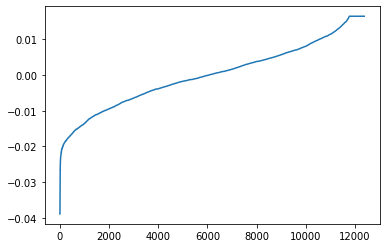

In [23]:
plt.plot(np.sort(ys_train))

In [39]:
p = 8

In [40]:
R2_adj = 1-SSRes/(n_train-p)/(SST/(n_train-1))
R2_adj

0.6386899329718676

In [48]:
#test MSE

yhat_test = Xs_test.dot(beta1.reshape(8,1))
MSE = (1/n_test)*np.sum((ys_test.reshape(n_test,1)-yhat_test)**2)
MSE

#how to measure the performance???

4.2425305144429745e-05

In [42]:
ys_test

array([-0.00363465,  0.00283722, -0.01536285, ..., -0.01027316,
       -0.00456273, -0.00670186])

In [43]:
yhat_test

array([[-0.00378524],
       [-0.00237619],
       [-0.00445609],
       ...,
       [-0.00669682],
       [-0.00845092],
       [-0.00205459]])

(8256, 8256)

In [27]:
np.shape(beta1)

(8,)

In [20]:
#R-student residuals

#compute ei
ei_train = (ys_train - yhat_train).reshape(n_train,1)

In [21]:
#compute hii

H_train = Xs_train.dot(np.linalg.inv(Xs_train.T.dot(Xs_train))).dot(Xs_train.T)

Hii_train = np.diagonal(H_train).reshape(n_train,1)

In [22]:
#compute S2_i

S2_i = ((SSRes - ei_train**2)/(1-Hii_train))/(n_train-p-1)

In [32]:
np.shape(ei_train)

(12384, 1)

In [23]:
#R-student residuals

ti = ei_train/np.sqrt(S2_i*(1-Hii_train))

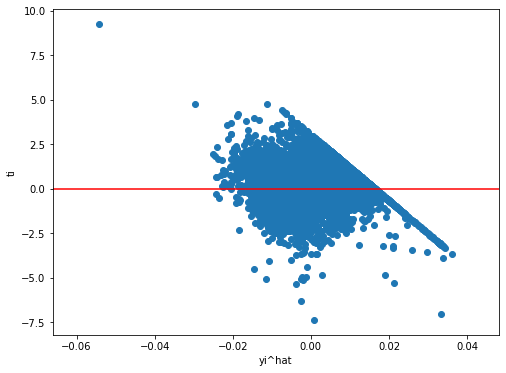

In [24]:
#plot R-student residuals

plt.figure(figsize = (8,6))

plt.scatter(yhat_train.reshape(n_train,1),ti)
plt.xlabel("yi^hat")
plt.ylabel('ti')
plt.axhline(y=0,c="red")
plt.savefig("rstplot.png")

In [33]:
#outlier

##student residuals

MSRes = SSRes/(n_train-p)
ri = ei_train/np.sqrt(1-Hii_train)

In [34]:
#cook's measure

Di = (ri**2/p)*(Hii_train/(1-Hii_train))

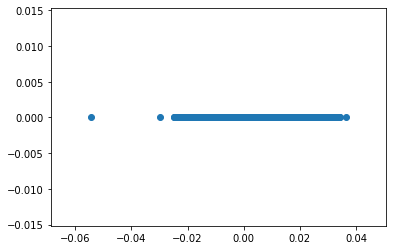

In [42]:
plt.scatter(yhat_train,Di)

In [45]:
outliers=[]

for i in Di:
    if i > (4/n_train):
        outliers.append(i)
outliers

[]

In [36]:
# DFFITS

DFFITS = np.sqrt(Hii_train/(1-Hii_train))*ti

outliers1=[]

for i in DFFITS:
    if i > 2*np.sqrt(p/n_train):
        outliers1.append(i)
outliers1

[array([0.09197852]),
 array([0.13168929]),
 array([0.08742976]),
 array([0.05369453]),
 array([0.09462826]),
 array([0.11050288]),
 array([0.12785511]),
 array([0.05371974]),
 array([0.13866449]),
 array([0.06395767]),
 array([0.06531152]),
 array([0.121534]),
 array([0.06873436]),
 array([0.05525777]),
 array([0.06947004]),
 array([0.07270507]),
 array([0.07950088]),
 array([0.05294889]),
 array([0.08483338]),
 array([0.07420878]),
 array([0.06312113]),
 array([0.05392315]),
 array([0.05602757]),
 array([0.06717536]),
 array([0.08296477]),
 array([0.15999349]),
 array([0.08187243]),
 array([0.08596448]),
 array([0.05300178]),
 array([0.06249637]),
 array([0.05291445]),
 array([0.08954787]),
 array([0.08317727]),
 array([0.06539006]),
 array([0.05259911]),
 array([0.05738293]),
 array([0.06389739]),
 array([0.11592148]),
 array([0.08979854]),
 array([0.10438144]),
 array([0.09965372]),
 array([0.0608324]),
 array([0.05346964]),
 array([0.11495172]),
 array([0.05472241]),
 array([0.056

In [39]:
outliers1

[array([0.09197852]),
 array([0.13168929]),
 array([0.08742976]),
 array([0.05369453]),
 array([0.09462826]),
 array([0.11050288]),
 array([0.12785511]),
 array([0.05371974]),
 array([0.13866449]),
 array([0.06395767]),
 array([0.06531152]),
 array([0.121534]),
 array([0.06873436]),
 array([0.05525777]),
 array([0.06947004]),
 array([0.07270507]),
 array([0.07950088]),
 array([0.05294889]),
 array([0.08483338]),
 array([0.07420878]),
 array([0.06312113]),
 array([0.05392315]),
 array([0.05602757]),
 array([0.06717536]),
 array([0.08296477]),
 array([0.15999349]),
 array([0.08187243]),
 array([0.08596448]),
 array([0.05300178]),
 array([0.06249637]),
 array([0.05291445]),
 array([0.08954787]),
 array([0.08317727]),
 array([0.06539006]),
 array([0.05259911]),
 array([0.05738293]),
 array([0.06389739]),
 array([0.11592148]),
 array([0.08979854]),
 array([0.10438144]),
 array([0.09965372]),
 array([0.0608324]),
 array([0.05346964]),
 array([0.11495172]),
 array([0.05472241]),
 array([0.056

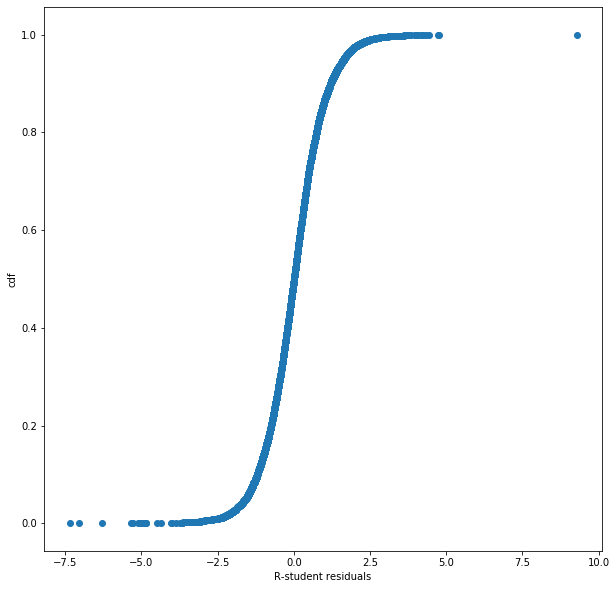

In [35]:
#normal probability plot

Pi = (np.arange(1,n_train+1)-0.5)/n_train

plt.figure(figsize = (10,10))

plt.scatter(sorted(ti),Pi)
plt.xlabel("R-student residuals")
plt.ylabel('cdf')

plt.savefig("nmplot.png")

In [30]:
sorted(ti)

[array([-7.3584497]),
 array([-7.05153689]),
 array([-6.29317477]),
 array([-5.3341885]),
 array([-5.28667245]),
 array([-5.11797697]),
 array([-5.05431379]),
 array([-5.03851771]),
 array([-4.95053073]),
 array([-4.92955418]),
 array([-4.86717832]),
 array([-4.85057871]),
 array([-4.485118]),
 array([-4.36570025]),
 array([-4.03803866]),
 array([-3.99337293]),
 array([-3.86618825]),
 array([-3.73390226]),
 array([-3.68222648]),
 array([-3.67752062]),
 array([-3.67008826]),
 array([-3.6630314]),
 array([-3.6593443]),
 array([-3.62219463]),
 array([-3.52611872]),
 array([-3.52369621]),
 array([-3.43943758]),
 array([-3.33495849]),
 array([-3.33190532]),
 array([-3.3075218]),
 array([-3.27660564]),
 array([-3.253492]),
 array([-3.24606252]),
 array([-3.22459411]),
 array([-3.22346237]),
 array([-3.2085646]),
 array([-3.20834288]),
 array([-3.18062479]),
 array([-3.17819458]),
 array([-3.14359351]),
 array([-3.13252421]),
 array([-3.13181408]),
 array([-3.12315155]),
 array([-3.09772144])

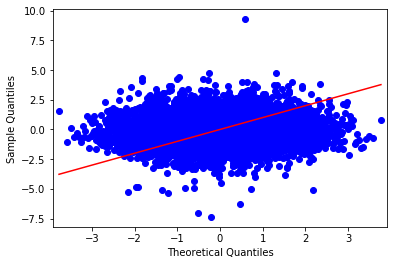

In [34]:
#qq-plot
import statsmodels.api as sm
import pylab
sm.qqplot(ti, line='s')
pylab.show()

In [52]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [53]:
#With scaling

degree = 2

poly = PolynomialFeatures(degree)
X_ = poly.fit_transform(Xs_train)

Y_ = ys_train
model = LinearRegression(fit_intercept=True)
model.fit(X_, Y_)
print(model.coef_)

[-7.68143384e-15 -1.16020219e+00 -1.29122824e+00  8.39809936e-02
 -4.94789799e-01  6.73412337e-01 -4.71866895e-01  3.03022406e-01
  8.06159609e-01  1.44218661e+01  4.80335564e+01 -2.67831808e+01
  5.76921005e+01 -2.57201020e+01  6.55537923e+00 -3.65964531e+01
 -8.54408314e+00  3.38702780e+01 -3.09217551e+01  6.87551170e+01
 -4.28096101e+01  8.48595866e+00 -3.30852175e+01 -8.92626428e+00
  2.58198218e+00 -7.72368422e+00  5.94674026e+00 -1.41831292e+01
  1.84572486e+01  1.61638021e+00 -4.39581640e+00  1.82883344e+01
 -1.72652201e+01  1.15198765e+01  2.10690148e+01 -2.13864954e+01
  2.14996399e+01 -4.96391605e+00 -2.22237889e+01  2.98792739e+00
 -9.72395414e+00  6.12048170e+00  3.47270648e+00  1.72719636e+00
 -1.14373507e+01]


In [54]:
np.shape(model.coef_)

(45,)

In [55]:
beta2 = model.coef_.reshape(45,1)
np.shape(beta2)

(45, 1)

In [56]:
#with scaling

X_test1 = poly.fit_transform(Xs_test)

In [57]:
yhat_test1 = X_test1.dot(beta2)
MSE = (1/n_test)*np.sum((ys_test.reshape(n_test,1)-yhat_test1)**2)
MSE

3.556840906619363e-05

In [59]:
yhat_test1 = X_test1.dot(beta2)

In [60]:
model.score(X_,Y_)

0.7181219960542704

In [61]:
SST = np.sum((ys_test-np.mean(ys_test))**2)
SSRes = np.sum((ys_test.reshape(n_test,1)-yhat_test1)**2)

R2 = 1-SSRes/SST
R2

0.7063472147495055

In [62]:
R2_adj = 1-SSRes/(n_train-p)/(SST/(n_train-1))
R2_adj

0.7061811215451783

In [63]:
#add L2 regulirization

from sklearn.linear_model import Ridge

In [64]:
np.shape(X_)

(12384, 45)

In [65]:
clf = Ridge(alpha=0.01)
clf.fit(X_, ys_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
X_ = poly.fit_transform(Xs_train)
clf.score(X_, ys_train)

0.6410869456985444

In [67]:
##R2_adj

clf.score(X_, ys_train)*((n_train-1)/(n_train-p))+1-((n_train-1)/(n_train-p))

0.6408839405773332

In [68]:
beta3 = clf.coef_.reshape(45,1)

In [69]:
np.shape(beta3)

(45, 1)

In [70]:
np.shape(beta2)

(45, 1)

In [71]:
X_test2 = poly.fit_transform(Xs_test)
yhat_test2 = X_test2.dot(beta3)
MSE = (1/n_test)*np.sum((ys_test.reshape(n_test,1)-yhat_test2)**2)
MSE

4.2259655094506205e-05

In [6]:
X_train = np.array(D_train.iloc[:,0:8])
#X_train = np.hstack((np.ones(n_train).reshape(n_train,1),X_train))
y_train = np.array(D_train.iloc[:,8])
X_test = np.array(D_test.iloc[:,0:8])
#X_test = np.hstack((np.ones(n_test).reshape(n_test,1),X_test))
y_test = np.array(D_test.iloc[:,8])

In [7]:
x = np.array(data.iloc[:,0:8])
y = np.array(data.iloc[:,8])

In [44]:
#data preparation
x1 = []
for i in X_train.T[:,0:2001]:
    x1.append(i)
y1 = y_train[0:2001]

In [45]:
len(x1)

8

In [46]:
from ace import model
myace = model.Model()

In [47]:
myace.build_model_from_xy(x1, y1)

* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  3.82075E-01
  Starting inner iteration 002. Current err =  3.13414E-01
  Starting inner iteration 003. Current err =  3.01924E-01
  Starting inner iteration 004. Current err =  2.95635E-01
  Starting inner iteration 005. Current err =  2.93424E-01
  Starting inner iteration 006. Current err =  2.90377E-01
  Starting inner iteration 007. Current err =  2.86960E-01
  Starting inner iteration 008. Current err =  2.84332E-01
  Starting inner iteration 009. Current err =  2.82385E-01
  Starting inner iteration 010. Current err =  2.80314E-01
  Starting inner iteration 011. Current err =  2.78648E-01
  Starting inner iteration 012. Current err =  2.77300E-01
  Starting inner iteration 013. Current err =  2.77028E-01
* Starting outer iteration 001. Current err =  2.62888E-01
  Starting inner iteration 000. Current err =  2.62888E-

* Starting outer iteration 003. Current err =  2.24879E-01
  Starting inner iteration 000. Current err =  2.24879E-01
  Starting inner iteration 001. Current err =  2.23501E-01
  Starting inner iteration 002. Current err =  2.23410E-01
  Starting inner iteration 003. Current err =  2.23334E-01
  Starting inner iteration 004. Current err =  2.23243E-01
  Starting inner iteration 005. Current err =  2.23189E-01
  Starting inner iteration 006. Current err =  2.23144E-01
  Starting inner iteration 007. Current err =  2.23115E-01
  Starting inner iteration 008. Current err =  2.23051E-01
  Starting inner iteration 009. Current err =  2.23031E-01
  Starting inner iteration 010. Current err =  2.22989E-01
  Starting inner iteration 011. Current err =  2.22942E-01
  Starting inner iteration 012. Current err =  2.22876E-01
  Starting inner iteration 013. Current err =  2.22852E-01
  Starting inner iteration 014. Current err =  2.22831E-01
  Starting inner iteration 015. Current err =  2.22814E-

In [48]:
from ace import ace
#ace.plot_transforms(myace, fname = 'mytransforms.pdf')
myace.ace.write_transforms_to_file(fname = 'mytransforms1.txt')

In [49]:
df = []

with open('mytransforms1.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)

In [50]:
#2nd training
x2 = []
for i in X_train.T[:,2001:4001]:
    x2.append(i)
y2 = y_train[2001:4001]

myace = model.Model()

myace.build_model_from_xy(x2, y2)

myace.ace.write_transforms_to_file(fname = 'mytransforms2.txt')

with open('mytransforms2.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)

* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  3.94433E-01
  Starting inner iteration 002. Current err =  3.25982E-01
  Starting inner iteration 003. Current err =  3.16215E-01
  Starting inner iteration 004. Current err =  3.10560E-01
  Starting inner iteration 005. Current err =  3.05684E-01
  Starting inner iteration 006. Current err =  3.01640E-01
  Starting inner iteration 007. Current err =  2.98111E-01
  Starting inner iteration 008. Current err =  2.95025E-01
  Starting inner iteration 009. Current err =  2.92697E-01
  Starting inner iteration 010. Current err =  2.90942E-01
  Starting inner iteration 011. Current err =  2.89466E-01
  Starting inner iteration 012. Current err =  2.87974E-01
  Starting inner iteration 013. Current err =  2.86940E-01
  Starting inner iteration 014. Current err =  2.85887E-01
  Starting inner iteration 015. Current err =  2.84893E-

In [51]:
#3rd training
x3 = []
for i in X_train.T[:,4001:6001]:
    x3.append(i)
y3 = y_train[4001:6001]

myace = model.Model()

myace.build_model_from_xy(x3, y3)

myace.ace.write_transforms_to_file(fname = 'mytransforms3.txt')

with open('mytransforms3.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)

* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  3.88119E-01
  Starting inner iteration 002. Current err =  3.08808E-01
  Starting inner iteration 003. Current err =  2.94192E-01
  Starting inner iteration 004. Current err =  2.85477E-01
  Starting inner iteration 005. Current err =  2.80399E-01
  Starting inner iteration 006. Current err =  2.76878E-01
  Starting inner iteration 007. Current err =  2.73795E-01
  Starting inner iteration 008. Current err =  2.70976E-01
  Starting inner iteration 009. Current err =  2.68608E-01
  Starting inner iteration 010. Current err =  2.66864E-01
  Starting inner iteration 011. Current err =  2.65260E-01
  Starting inner iteration 012. Current err =  2.64051E-01
  Starting inner iteration 013. Current err =  2.62893E-01
  Starting inner iteration 014. Current err =  2.61880E-01
  Starting inner iteration 015. Current err =  2.60859E-

In [52]:
#4th training
x4 = []
for i in X_train.T[:,6001:8001]:
    x4.append(i)
y4 = y_train[6001:8001]

myace = model.Model()

myace.build_model_from_xy(x4, y4)

myace.ace.write_transforms_to_file(fname = 'mytransforms4.txt')

with open('mytransforms4.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)

* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  3.51171E-01
  Starting inner iteration 002. Current err =  2.88356E-01
  Starting inner iteration 003. Current err =  2.78177E-01
  Starting inner iteration 004. Current err =  2.71519E-01
  Starting inner iteration 005. Current err =  2.66427E-01
  Starting inner iteration 006. Current err =  2.63000E-01
  Starting inner iteration 007. Current err =  2.61336E-01
  Starting inner iteration 008. Current err =  2.58590E-01
  Starting inner iteration 009. Current err =  2.56766E-01
  Starting inner iteration 010. Current err =  2.55019E-01
  Starting inner iteration 011. Current err =  2.53546E-01
  Starting inner iteration 012. Current err =  2.52286E-01
  Starting inner iteration 013. Current err =  2.51130E-01
  Starting inner iteration 014. Current err =  2.50199E-01
  Starting inner iteration 015. Current err =  2.49284E-

  Starting inner iteration 001. Current err =  2.04189E-01
  Starting inner iteration 002. Current err =  2.04177E-01
* Starting outer iteration 011. Current err =  2.04164E-01
  Starting inner iteration 000. Current err =  2.04164E-01
  Starting inner iteration 001. Current err =  2.04145E-01
  Starting inner iteration 002. Current err =  2.04135E-01
  Starting inner iteration 003. Current err =  2.04131E-01
  Starting inner iteration 004. Current err =  2.04129E-01
* Starting outer iteration 012. Current err =  2.04120E-01
  Starting inner iteration 000. Current err =  2.04120E-01
  Starting inner iteration 001. Current err =  2.04108E-01
  Starting inner iteration 002. Current err =  2.04101E-01
  Starting inner iteration 003. Current err =  2.04095E-01
  Starting inner iteration 004. Current err =  2.04093E-01
* Starting outer iteration 013. Current err =  2.04089E-01
  Starting inner iteration 000. Current err =  2.04089E-01
  Starting inner iteration 001. Current err =  2.04073E-

In [53]:
#5th training
x5 = []
for i in X_train.T[:,8001:n_train+1]:
    x5.append(i)
y5 = y_train[8001:n_train+1]

myace = model.Model()

myace.build_model_from_xy(x5, y5)

myace.ace.write_transforms_to_file(fname = 'mytransforms5.txt')

with open('mytransforms5.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)

* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  3.96770E-01
  Starting inner iteration 002. Current err =  3.17544E-01
  Starting inner iteration 003. Current err =  3.02249E-01
  Starting inner iteration 004. Current err =  2.94154E-01
  Starting inner iteration 005. Current err =  2.88777E-01
  Starting inner iteration 006. Current err =  2.84890E-01
  Starting inner iteration 007. Current err =  2.81667E-01
  Starting inner iteration 008. Current err =  2.79242E-01
  Starting inner iteration 009. Current err =  2.77031E-01
  Starting inner iteration 010. Current err =  2.75074E-01
  Starting inner iteration 011. Current err =  2.73260E-01
  Starting inner iteration 012. Current err =  2.71241E-01
  Starting inner iteration 013. Current err =  2.69127E-01
  Starting inner iteration 014. Current err =  2.66669E-01
  Starting inner iteration 015. Current err =  2.65394E-

  Starting inner iteration 036. Current err =  2.25992E-01
  Starting inner iteration 037. Current err =  2.25984E-01
  Starting inner iteration 038. Current err =  2.25975E-01
  Starting inner iteration 039. Current err =  2.25968E-01
  Starting inner iteration 040. Current err =  2.25961E-01
  Starting inner iteration 041. Current err =  2.25958E-01
  Starting inner iteration 042. Current err =  2.25951E-01
* Starting outer iteration 004. Current err =  2.24980E-01
  Starting inner iteration 000. Current err =  2.24980E-01
  Starting inner iteration 001. Current err =  2.24915E-01
  Starting inner iteration 002. Current err =  2.24899E-01
  Starting inner iteration 003. Current err =  2.24869E-01
  Starting inner iteration 004. Current err =  2.24860E-01
  Starting inner iteration 005. Current err =  2.24852E-01
  Starting inner iteration 006. Current err =  2.24848E-01
  Starting inner iteration 007. Current err =  2.24845E-01
  Starting inner iteration 008. Current err =  2.24842E-

In [73]:
df = []
with open('mytransforms1.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)
with open('mytransforms2.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)
with open('mytransforms3.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)
with open('mytransforms4.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)
with open('mytransforms5.txt') as f:
    for line in f.readlines():
        temp = line.split()
        df.append(temp)

In [74]:
df_ = np.array(df).astype(np.float64)

In [75]:
X = df_[:,1:]

In [76]:
np.shape(X)

(12384, 8)

In [77]:
X = np.hstack((np.ones(12384).reshape(12384,1),X))

In [78]:
Y = df_[:,0]

In [79]:
beta4 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [80]:
beta4

array([8.52169897e-13, 1.05926244e+00, 1.06187193e+00, 9.27708757e-01,
       1.07070756e+00, 1.11211388e+00, 1.10966853e+00, 1.09842886e+00,
       1.00078039e+00])

In [81]:
Yhat = X.dot(beta4)

In [82]:
Yhat

array([ 1.06247175, -1.34970015,  0.35483904, ..., -1.59319785,
       -0.92544747,  0.18334228])

In [83]:
SST = np.sum((Y-np.mean(Y))**2)
SSRes = np.sum((Y-Yhat)**2)

In [84]:
R2 = 1-SSRes/SST
R2

0.7802617208331148

In [85]:
MSE = SSRes/n_train
MSE

0.2197382791672019

In [86]:
R2_adj = 1-SSRes/(2000-9)/(SST/(2000-1))
R2_adj

0.7793787945481649

In [71]:
ei = (Y - Yhat).reshape(12384,1)
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)


Hii = np.diagonal(H).reshape(12384,1)
S2_i = ((SSRes - ei**2)/(1-Hii))/(12384-9-1)

ti = ei/np.sqrt(S2_i*(1-Hii))

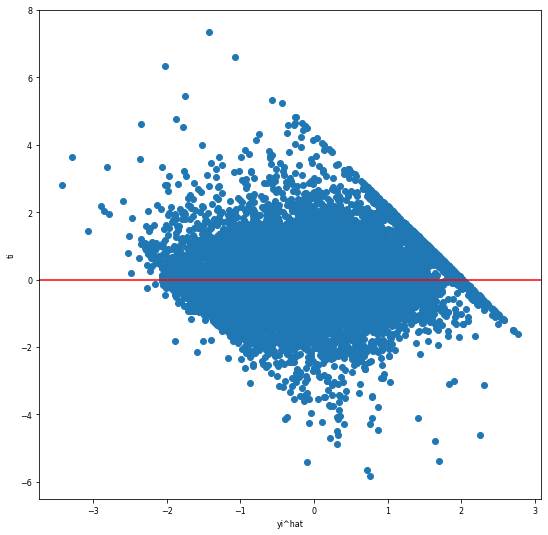

In [73]:
#plot R-student residuals

plt.figure(figsize = (9,9))

plt.scatter(Yhat.reshape(12384,1),ti)
plt.xlabel("yi^hat")
plt.ylabel('ti')
plt.axhline(y=0,c="red")
plt.savefig("aceplot.png")

In [8]:
x = X_train

In [16]:
y = np.exp(y_train)

In [9]:
x = np.hstack((np.ones(n_train).reshape(n_train,1),x))

In [17]:
beta5 = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [18]:
yhat = x.dot(beta5)

In [19]:
SSRes = np.sum((y-yhat)**2)

In [20]:
ei = (y - yhat).reshape(n_train,1)
H = x.dot(np.linalg.inv(x.T.dot(x))).dot(x.T)


Hii = np.diagonal(H).reshape(n_train,1)
S2_i = ((SSRes - ei**2)/(1-Hii))/(n_train-9-1)

ti = ei/np.sqrt(S2_i*(1-Hii))

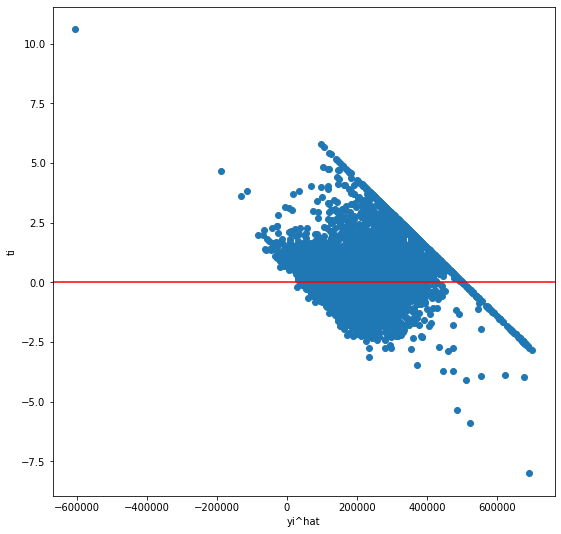

In [22]:
#plot R-student residuals

plt.figure(figsize = (9,9))

plt.scatter(yhat.reshape(n_train,1),ti)
plt.xlabel("yi^hat")
plt.ylabel('ti')
plt.axhline(y=0,c="red")
plt.savefig("ols_no1.png")